<a href="https://colab.research.google.com/github/shubha07m/Deep-learning-using-Python-CS5590/blob/master/mnist_basic_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import tensorflow as tf
from keras import datasets,layers,models
from keras.engine.sequential import Sequential
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix , classification_report
import cv2
from google.colab.patches import cv2_imshow
from keras.backend import sparse_categorical_crossentropy
from keras.optimizers import SGD
from google.colab import drive
from google.colab import files


In [37]:
(x_train,y_train),(x_test,y_test) = datasets.mnist.load_data()

In [38]:
print(np.shape(x_train))
print(np.shape(x_test))
print(np.shape(y_train))
print(np.shape(y_test))

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [4]:
classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

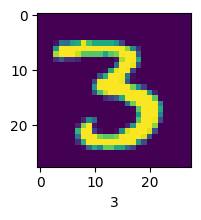

In [5]:
def plot_sample(x,y,sample):
  plt.figure(figsize=(10,2))
  plt.imshow(x[sample])
  plt.xlabel(classes[y[sample]])

plot_sample(x_train,y_train,12)

In [6]:
x_train = x_train/255
x_test = x_test/255

In [43]:
# Making a new CNN model #

cnn = models.Sequential()

# cnn layers #

cnn.add(layers.Conv2D(filters=16, kernel_size = (3,3), padding = 'same', strides = (2,2), activation='relu',input_shape=(28,28,1)))
cnn.add(layers.MaxPooling2D(2,2))

cnn.add(layers.Conv2D(filters=32, kernel_size = (3,3), activation='relu'))
cnn.add(layers.MaxPooling2D(2,2))


# # Dense network #
cnn.add(layers.Flatten())
cnn.add(layers.Dense(64,activation='relu'))
cnn.add(layers.Dense(10,activation='softmax'))

# Compiling the mdoel #
cnn.compile(optimizer='adam', loss=sparse_categorical_crossentropy, metrics='accuracy')

In [44]:
history = cnn.fit(x_train, y_train, epochs=10, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.6868 - accuracy: 0.8649 - val_loss: 0.1736 - val_accuracy: 0.9479
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1439 - accuracy: 0.9553 - val_loss: 0.1203 - val_accuracy: 0.9645
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1069 - accuracy: 0.9673 - val_loss: 0.0934 - val_accuracy: 0.9729
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0871 - accuracy: 0.9738 - val_loss: 0.0804 - val_accuracy: 0.9747
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0740 - accuracy: 0.9775 - val_loss: 0.0757 - val_accuracy: 0.9775
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0657 - accuracy: 0.9789 - val_loss: 0.0726 - val_accuracy: 0.9778
Epoch 7/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0589 - accuracy: 0.9816 - val_loss: 0.0850 - val_ac

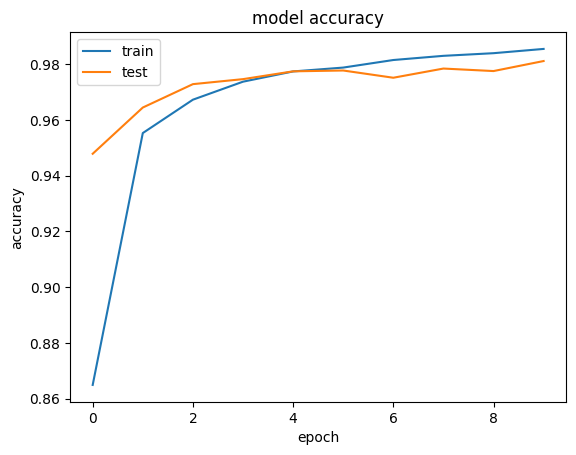

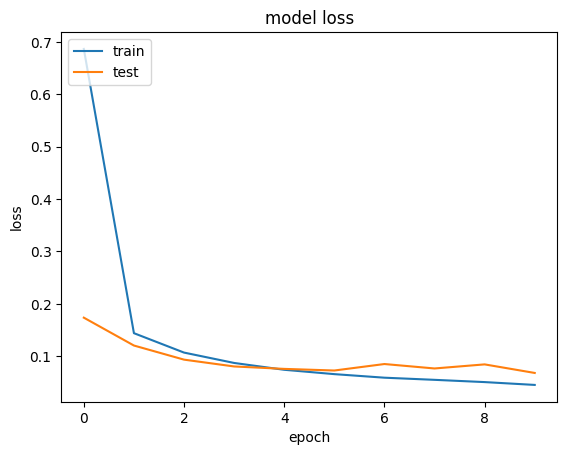

In [45]:
# # plotting training and test accuracy from history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# plotting training and test loss from history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [46]:
# Printing the mdoel
cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 14, 14, 16)        160       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 5, 5, 32)          4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 2, 2, 32)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 64)               

In [47]:
y_pred = cnn.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 3ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.96      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.98      0.97       974
           9       0.96      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [48]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0680 - accuracy: 0.9812


[0.06796569377183914, 0.9811999797821045]

In [49]:
y_new = (y_test.reshape(-1,))[:5]
y_new

array([7, 2, 1, 0, 4], dtype=uint8)

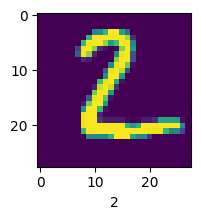

In [50]:
plot_sample(x_test,y_test,1)

313/313 [==============================] - 1s 4ms/step
predicted class: 7
predicted class: 2
predicted class: 3
predicted class: 0
predicted class: 4
predicted class: 4
predicted class: 2


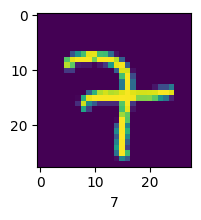

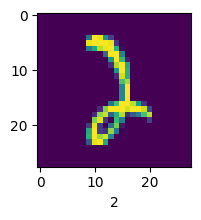

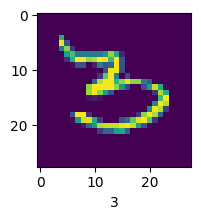

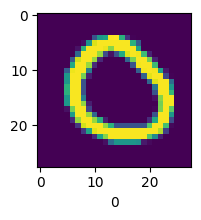

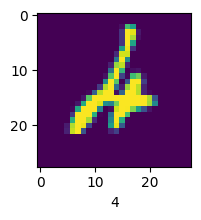

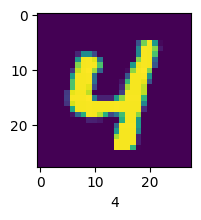

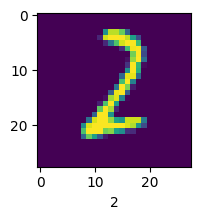

In [51]:
y_predict = cnn.predict(x_test)
for i in range(243,250):
  
  print("predicted class:" , classes[np.argmax(y_predict[i])])
  plot_sample(x_test,y_test,i)

In [42]:
# For stopping overriding the previously saved model #
assert False

AssertionError: ignored

In [ ]:
# Mounting the drive
drive.mount('/content/drive')
cnn.save_weights('cnn_mnistdigit_weights.h5')
cnn.save('cnn_mnistdigit.h5')

In [35]:
# Download the file
files.download('cnn_mnistdigit.h5')
files.download('cnn_mnistdigit_weights.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>